# Introdução

<b>Aviso legal:</b> <i>O conteúdo exposto nesse artigo é Fanart, o universo de Pokémon foi apenas utilizado como inspiração e homenagem a uma franquia que fez parte da minha vida, não possuo nenhum direito sobre a marca <b>Pokémon®</b> e seu conteúdo, ela pertence a <b>Nintendo/Game Freak/Creatures Inc.</b>.</i><br>

Esse notebook foi escrito por <b>Leonardo Cezar</b>, ele faz parte do artigo originalmente postado no Medium [Web Scraping, Pandas e Gráficos com Python em Pokémon](https://medium.com/@paaarx/web-scraping-pandas-graficos-com-python-no-pokemon-17803d1d49b1), [para baixar o notebook original clique aqui](https://github.com/paaarx/article/tree/master/pokemon).<br>

É permitido a reprodução seu conteúdo livremente, desde que o conteúdo não seja alterado e o autor referenciado e não seja infringindo qualquer direito autoral da marca <b>Pokémon®</b>.<br>

[Toss a coin to your Witcher: Doe qualquer quantia pelo Paypal](https://www.paypal.com/cgi-bin/webscr?cmd=_donations&business=B7T59X8WJ8CWY&currency_code=BRL&source=url).

# Instalar e importar Bibliotecas

A célula contendo a instalação das bibliotecas precisa ser executada somente a primeira vez que executar esse notebook.<br>
Para executar, remova O "#" do "#!pip".

In [1]:
# Instalando as bibliotecas
#!pip install -U pandas
#!pip install -U requests
#!pip install -U bs4
#!pip install -U lxml # Algumas vezes aparece o aviso que não tem essa biblioteca, então já é bom instalar para evitar erros
#!pip install -U matplotlib
#!pip install -U seaborn

In [2]:
# Importando as bibliotecas

# Para fazer as análises
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random

# Para fazer os gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Acessar o site

Iremos acessar o site https://pokemondb.net/pokedex/all para obter a tabela com todos os atributos dos Pokémons.

<img src="pokemon_table.png"/>

In [3]:
# Endereço do site
url = 'https://pokemondb.net/pokedex/all'

# Gerando uma lista de user agent
# O user agent é o navegador que você está utilizando, no caso irá simular que está utilizando, para o exemplo desse
# notebook não é necessário ficar informando o user agent, porém é bom saber isso pois irá utilizar muito em futuros
# web scrapings
user_agent_list = [
                   'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.106 Safari/537.36',
                   'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.106 Safari/537.36',
                   'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.106 Safari/537.36',
                   'Mozilla/5.0 (Linux; Android 8.0.0;) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.99 Mobile Safari/537.36',
                   'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/80.0.3987.95 Mobile/15E148 Safari/605.1'
                   ]
# Para evitar ficar acessando com o mesmo agent, cada execução ele escolhe um aleatoriamente
user_agent = random.choice(user_agent_list)

# Monta o cabeçalho com o user agent
headers = {'User-Agent' : user_agent}

# Faz a Requisição, ou seja, tenta acessar o site informando a url, user agent e desejando obter a resposta do servidor em
# até 3 segundos
try:
    response = requests.get(url, headers = headers, timeout = 3) # Requisição
    # Retorna o status da resposta com o servidor, se for sucesso (200) não fará nada, caso contrário já irá para alguma
    # das exceções
    response.raise_for_status()
    # Obtém toda a informação do site em formato texto/html
    content = response.text
except requests.exceptions.HTTPError as http_error:
    # Retorna o erro do servidor, por exemplo 500, que é um erro interno no servidor
    print ('HTTP Error: ', http_error)
except requests.exceptions.ConnectionError as connection_error:
    # Retorna caso esteja sem conexão
    print ('Error Connecting: ', connection_error)
except requests.exceptions.Timeout as timeout_error:
    # Retorna caso o servidor não responda no tempo informado na requisição
    print ('Timeout Error: ', timeout_error)
except requests.exceptions.RequestException as generic_error:
    # Caso não seja nenhum dos erros acima, ele irá retornar esse, que é um erro genérico
    print ('Generic Error: ', generic_error)

# Transformar a tabela em um DataFrame

Primeiramente, devemos ativar o modo de análise do navegador, se você utiliza o Google Chrome, clique com o botão direito em cima da tabela e depois clique em "Inspecionar".<br>
Procure pela tag de tabela (table) e anote o valor que está contido no campo id (no caso é "pokedex").

<img src="pokemon_html_table.png"/>

## Método 1: Utilizando BeautifulSoup

In [4]:
# Usa o BeautifulSoup para transformar o conteúdo de texto/html em um objeto dele
soup = BeautifulSoup(content, 'html.parser')

# Iremos utilizar o método find para obter a tabela de id pokedex, nela está toda informação dos Pokémons
table = soup.find(name='table', attrs={'id' : 'pokedex'})

In [5]:
# O BeautifulSoup foi utilizado apenas para procurar e copiar todo o texto/html da tabela, porém ele retorna um objeto do
# BeautifulSoup, nesse código, será convertido o objeto BeautifulSoup para o tipo string
# Basicamente, se o texto/html fosse copiado e colado manualmente e salvo nessa variável seria a mesma coisa
table_str = str(table)

# Aqui é onde a mágica acontece, usando o read_html ele interpreta as tags da tabela (tr, th e td) e converte isso em um
# DataFrame
# tr = linha da tabela, th = coluna/cabeçalho e td = valor
# Para aprender mais sobre tabelas acesse: https://www.w3schools.com/tags/tag_table.asp
# Como o retorno do read_html será uma lista de DataFrames e sabemos que só terá um elemento na lista
# (só temos uma tabela e com id "pokemon"), então já a utilizaremos através do índice [0]
df = pd.read_html(table_str)[0]

## Método 2: Utilizando apenas read_html do Pandas

In [6]:
# Aqui é onde a mágica acontece, usando o read_html ele interpreta as tags da tabela (tr, th e td) e converte isso em um
# DataFrame
# tr = linha da tabela, th = coluna/cabeçalho e td = valor
# Para aprender mais sobre tabelas acesse: https://www.w3schools.com/tags/tag_table.asp
# Como o retorno do read_html será uma lista de DataFrames e sabemos que só terá um elemento na lista (só temos uma tabela e
# com id "pokemon"), então já a utilizaremos através do índice [0]
df = pd.read_html(content, attrs = {'id' : 'pokedex'})[0]

<b>Atenção:</b> Se por algum motivo o site [pokemondb.net](https://pokemondb.net/pokedex/all) estiver inacessível ou não existir mais, fazer o download do arquivo [pokemon.csv](https://github.com/paaarx/article/tree/master/pokemon/pokemon.csv), fazer upload no Jupyter, e descomentar a linha abaixo e executar.

In [7]:
# df = pd.read_csv('pokemon.csv', sep=';')

# Como utilizar um DataFrame

## Inspecionar o DataFrame

O primeiro passo é sempre checar se o DataFrame foi criado corretamente, verificando suas colunas, valores, etc.

In [8]:
# Imprimir todas as colunas do DataFrame
for column in df.columns:
    print(column)

#
Name
Type
Total
HP
Attack
Defense
Sp. Atk
Sp. Def
Speed


In [9]:
# Contar quantas linhas e colunas o DataFrame possui
# df.shape
# Use placeholders (chaves) {}, eles deixam o código mais bonito e ainda são formatadores poderosos
print(f'Linhas: {df.shape[0]}\nColunas: {df.shape[1]}')

Linhas: 1029
Colunas: 10


In [10]:
# Ver o tipo das variáveis
df.dtypes

#           int64
Name       object
Type       object
Total       int64
HP          int64
Attack      int64
Defense     int64
Sp. Atk     int64
Sp. Def     int64
Speed       int64
dtype: object

In [11]:
# Ver os 5 primeiros registros do DataFrame (o padrão do head é 5 e o índice sempre inicia em 0)
# Valores nulos ficam como None, essa é uma palavra reservada, NÃO É UM VALOR
# Quando há apenas o comando com retorno do DataFrame ou ele é o último, o resultado será exibido mesmo sem fazer nada,
# porém USE O DISPLAY, se um dia for trabalhar com Databricks e Spark, você irá me agradecer por colocar isso na sua cabeça
display(df.head())

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


Se haviam 10 colunas, porque apareceram 11?<br>
Não precisa se assustar jovem treinador, a primeira coluna, a que fica em negrito é o Índice, e futuramente irei falar sobre ele.

## Transformar e acessar dados do DataFrame

Agora que verificamos que o DataFrame foi criado corretamente, vamos começar a tratar os campos, os Pokémon são de 1 ou 2 tipos, conforme figura abaixo:

<img src="pokemon_type.png"/>

Na tabela original os valores de Tipo foram inseridos em uma célula separados por espaço, ou seja era "Grass Poison", "Fire", "Fire Flying".<br>
Nós queremos separar isso, e o motivo é que caso deseje fazer uma consulta ou análise ficará muito mais fácil tendo duas colunas, chamadas de Tipo 1 e Tipo 2 do que uma coluna chamada Tipo.<br>
Veja todo o trabalho que teríamos com apenas uma coluna, por exemplo, para trazer todos que são do tipo "Grass" e "Poison", toda vez teria que ler o campo Tipo, dividir a string pelo espaco e gerar uma lista, se a lista tiver apenas um valor, você não pode verificar se o segundo valor é "Poison" se não irá receber um erro de posição da lista inexistente (IndexError: index out of bounds), aí teríamos que tratar isso, sem contar que toda vez teria que executar isso tudo.

In [12]:
# Aqui acessamos a coluna Type com df['Type'], como a coluna é do tipo Series e não string, devemos converter para string
# com str, para então mandarmos dividir o texto por espaço, o parâmetro adicional expand serve para já retornar um DataFrame com o resultado 
# O Pandas é bem inteligente, basta você informar duas colunas e ele já vai colocar a primeira coluna no primeiro e a
# segunda coluna na segunda
df[['Type 1', 'Type 2']] = df['Type'].str.split(' ', expand=True)

# Remove a coluna Type, já que não será mais utilizada
df.drop(columns='Type')

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
0,1,Bulbasaur,318,45,49,49,65,65,45,Grass,Poison
1,2,Ivysaur,405,60,62,63,80,80,60,Grass,Poison
2,3,Venusaur,525,80,82,83,100,100,80,Grass,Poison
3,3,Venusaur Mega Venusaur,625,80,100,123,122,120,80,Grass,Poison
4,4,Charmander,309,39,52,43,60,50,65,Fire,None
...,...,...,...,...,...,...,...,...,...,...,...
1024,888,Zacian Hero of Many Battles,670,92,130,115,80,115,138,Fairy,None
1025,889,Zamazenta Crowned Shield,720,92,130,145,80,145,128,Fighting,Steel
1026,889,Zamazenta Hero of Many Battles,670,92,130,115,80,115,138,Fighting,None
1027,890,Eternatus,690,140,85,95,145,95,130,Poison,Dragon


Verificando o resultado da operação, agora temos as colunas Type 1 e Type 2:

In [13]:
display(df.head())

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,Grass,Poison
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,Grass,Poison
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,Grass,Poison
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,Grass,Poison
4,4,Charmander,Fire,309,39,52,43,60,50,65,Fire,None


Conforme falamos no exemplo anteriormente, o de trazer todos os Pokémons que são do tipo "Grass" e "Poison", veja como fica bem mais simples.

In [14]:
# São duas condições divididas por () e unidas pelo &
display(df[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison')])

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,Grass,Poison
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,Grass,Poison
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,Grass,Poison
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,Grass,Poison
56,43,Oddish,Grass Poison,320,45,50,55,75,65,30,Grass,Poison
57,44,Gloom,Grass Poison,395,60,65,70,85,75,40,Grass,Poison
58,45,Vileplume,Grass Poison,490,75,80,85,110,90,50,Grass,Poison
88,69,Bellsprout,Grass Poison,300,50,75,35,70,30,40,Grass,Poison
89,70,Weepinbell,Grass Poison,390,65,90,50,85,45,55,Grass,Poison
90,71,Victreebel,Grass Poison,490,80,105,65,100,70,70,Grass,Poison


Agora iremos fazer a mesma coisa do Tipo, porém iremos criar colunas para informar se o Pokémon é Alolan e Mega.

In [15]:
# Inicializa listas
regular_name = []
special_name = []
mega_evolution = []
alolan = []

# Para cada registro na coluna Name, ele divide o texto pelo espaço e retorna o primeiro e o segundo texto, o n = 1 serve
# para quebrar apenas em 2 partes, exemplo: 'Venusaur Mega Venusaur' ficará 'Venusaur' e 'Mega Venusaur'
for name in df['Name'].str.split(' ', n=1):
    # Se o nome tiver 3 textos
    if len(name) > 1:
        regular_name.append(name[0])
        special_name.append(name[1])

        # Se o segundo texto tiver a palavra 'Mega ' coloca True, caso contrário False
        if name[1].find('Mega ') != -1:
            mega_evolution.append(True)
        else: 
            mega_evolution.append(False)

        # Se o segundo texto tiver a palavra 'Alolan ' coloca True, caso contrário False
        if name[1].find('Alolan ') != -1:
            alolan.append(True)
        else: 
            alolan.append(False)

    else:
        # Se tiver apenas 1 texto, então define o nome como ele mesmo, nulo para o nome especial, e coloca False para Alolan
        # e Mega
        regular_name.append(name[0])
        special_name.append(None)
        mega_evolution.append(False)
        alolan.append(False)

# Define o valor da coluna com os valores gerados nas listas
df['Name'] = regular_name
df['Special Name'] = special_name
df['Mega Evolution'] = mega_evolution
df['Alolan'] = alolan

Verificando o resultado da operação, agora além da coluna Name que já existia, temos a Special Name, Mega Evolution e Alolan.

In [16]:
# Ver os 5 primeiros registros do DataFrame (o padrão do head é 5 e o índice sempre inicia em 0)
# Valores nulos ficam como None, essa é uma palavra reservada, NÃO É UM VALOR
display(df.head())

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,Grass,Poison,None,False,False
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,Grass,Poison,None,False,False
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,Grass,Poison,None,False,False
3,3,Venusaur,Grass Poison,625,80,100,123,122,120,80,Grass,Poison,Mega Venusaur,True,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,Fire,None,None,False,False


Estamos perto de fazer os gráficos, mas antes vamos fazer algumas análises em nosso DataFrame.
Vamos criar 2 DataFrames, um trazendo os 3 Pokémons mais fortes de Alola e outro com os 10 mais fortes no geral.

In [17]:
# Primeiro obtém os Pokémons de Alola, depois ordena pela coluna Total de forma descendente, depois adiciona o parâmetro 3
# no head (lembra que por padrão ele traz apenas os 5 primeiros)
df_top3_alolan = df[df['Alolan'] == True].sort_values(by = 'Total', ascending = False).head(3)

In [18]:
# Exibe o DataFrame, quando tem apenas um comando com o nome do DataFrame, basta executar que ele será impresso, mas vamos
# fazer direito né, vamos utilizar o display() - "Explícito é melhor que implícito."
display(df_top3_alolan)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan
134,103,Exeggutor,Grass Dragon,530,95,105,85,125,75,45,Grass,Dragon,Alolan Exeggutor,False,True
51,38,Ninetales,Ice Fairy,505,73,67,75,81,100,109,Ice,Fairy,Alolan Ninetales,False,True
118,89,Muk,Poison Dark,500,105,105,75,65,100,50,Poison,Dark,Alolan Muk,False,True


In [19]:
# Ordena pela coluna Total de forma descendente, depois adiciona o parâmetro 10 no head (lembra que por padrão ele traz
# apenas os 5 primeiros)
top10 = df.sort_values(by = 'Total', ascending = False).head(10)

In [20]:
# Exibe o DataFrame
display(top10)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan
1028,890,Eternatus,Poison Dragon,1125,255,115,250,125,250,130,Poison,Dragon,Eternamax,False,False
190,150,Mewtwo,Psychic Fighting,780,106,190,100,154,100,130,Psychic,Fighting,Mega Mewtwo X,True,False
191,150,Mewtwo,Psychic,780,106,150,70,194,120,140,Psychic,None,Mega Mewtwo Y,True,False
459,384,Rayquaza,Dragon Flying,780,105,180,100,180,100,115,Dragon,Flying,Mega Rayquaza,True,False
457,383,Groudon,Ground Fire,770,100,180,160,150,90,90,Ground,Fire,Primal Groudon,False,False
455,382,Kyogre,Water,770,100,150,90,180,160,90,Water,None,Primal Kyogre,False,False
931,800,Necrozma,Psychic Dragon,754,97,167,97,167,97,129,Psychic,Dragon,Ultra Necrozma,False,False
585,493,Arceus,Normal,720,120,120,120,120,120,120,Normal,None,None,False,False
1025,889,Zamazenta,Fighting Steel,720,92,130,145,80,145,128,Fighting,Steel,Crowned Shield,False,False
1023,888,Zacian,Fairy Steel,720,92,170,115,80,115,148,Fairy,Steel,Crowned Sword,False,False


Vamos aprender a trabalhar com os índices do DataFrame, antes coloque na cabeça, os índices SEMPRE iniciam em 0, não inicia em 1!<br>
Há dois tipos de índice, o Implícito (iloc) e o Explícito (loc).<br>
<b>O Implícito você ignora o primeira coluna (que está em negrito)</b> e faz a busca contando as linhas, ou seja, seria como se ele tivesse reiniciado a indexador da lista e ela ficasse 0, 1, 2, ... então o terceiro elemento da lista será o 2.<br>
<b>O Explícito você usa a primeira coluna (que está em negrito)</b> e faz a busca direto nela, ou seja, seria como se fosse "me traga o registro de índice 2".<br>
Vamos fazer um teste usando os dois índices.

In [21]:
# Trazer o terceiro elemento do DataFrame
display(top10.iloc[[2]])

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan
191,150,Mewtwo,Psychic,780,106,150,70,194,120,140,Psychic,None,Mega Mewtwo Y,True,False


In [22]:
# Como já sei que dará erro, coloquei um try para exibir uma mensagem tratatada
# Tenta trazer o elemento de índice 2
try:
    display(top10.loc[[2]])
except:
    print('Não existe esse Índice Explícito')

Não existe esse Índice Explícito


Agora vamos reiniciar o índice, fazer ele começar em 0 e seguir adiante.

In [23]:
# Reinicia o índice e substitui o antigo, cuidado com os inplace, eles são irreversíveis!
top10.reset_index(inplace=True, drop=True)

Exibindo o DataFrame após reiniciar o índice.

In [24]:
# Exibe o DataFrame
display(top10)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan
0,890,Eternatus,Poison Dragon,1125,255,115,250,125,250,130,Poison,Dragon,Eternamax,False,False
1,150,Mewtwo,Psychic Fighting,780,106,190,100,154,100,130,Psychic,Fighting,Mega Mewtwo X,True,False
2,150,Mewtwo,Psychic,780,106,150,70,194,120,140,Psychic,None,Mega Mewtwo Y,True,False
3,384,Rayquaza,Dragon Flying,780,105,180,100,180,100,115,Dragon,Flying,Mega Rayquaza,True,False
4,383,Groudon,Ground Fire,770,100,180,160,150,90,90,Ground,Fire,Primal Groudon,False,False
5,382,Kyogre,Water,770,100,150,90,180,160,90,Water,None,Primal Kyogre,False,False
6,800,Necrozma,Psychic Dragon,754,97,167,97,167,97,129,Psychic,Dragon,Ultra Necrozma,False,False
7,493,Arceus,Normal,720,120,120,120,120,120,120,Normal,None,None,False,False
8,889,Zamazenta,Fighting Steel,720,92,130,145,80,145,128,Fighting,Steel,Crowned Shield,False,False
9,888,Zacian,Fairy Steel,720,92,170,115,80,115,148,Fairy,Steel,Crowned Sword,False,False


Agora que os índices foram reiniciados, vamos repetir as buscas por índice.

In [25]:
# Trazer o terceiro elemento do DataFrame
display(top10.iloc[[2]])

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan
2,150,Mewtwo,Psychic,780,106,150,70,194,120,140,Psychic,None,Mega Mewtwo Y,True,False


In [26]:
# Tenta trazer o elemento de índice 2
display(top10.loc[[2]])

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan
2,150,Mewtwo,Psychic,780,106,150,70,194,120,140,Psychic,None,Mega Mewtwo Y,True,False


Dessa vez ele trouxe os dois registros iguais, porque agora os índices bateram.<br>
<b>Tome cuidado com as coincidências, pode acontecer algum caso como esse, porém nem sempre, então cuidado para não quebrar o código usando o índice de forma incorreta</b>.

Agora que aprendeu a utilizar o índice, faremos uma operação utilizando ele para gerar os nomes dos Pokémons para exibirmos futuramente em um gráfico.

In [27]:
# Inicializa lista
x_axis_name = []

# Para cada linha no DataFrame, obtemos o índice (i) e os valores (row)
for i, row in top10.iterrows():
    # Acessando pelo índice top10.iloc[i], exemplo top10.iloc[0]
    # Se a coluna Special Name não for nula, ele concatena a coluna Name com Special Name utilizando ' - ' e coloca na lista
    if top10.iloc[i]['Special Name'] is not None:
        x_axis_name.append(top10.iloc[i]['Name'] + ' - ' + top10.iloc[i]['Special Name'])
    else:
        # Se a coluna Special Name for nula ele coloca na lista apenas o Name
        x_axis_name.append(top10.iloc[i]['Name'])

# Define a coluna com o valor da lista
top10['Name'] = x_axis_name

Verificando o resultado da operação dos nomes.

In [28]:
display(top10)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan
0,890,Eternatus - Eternamax,Poison Dragon,1125,255,115,250,125,250,130,Poison,Dragon,Eternamax,False,False
1,150,Mewtwo - Mega Mewtwo X,Psychic Fighting,780,106,190,100,154,100,130,Psychic,Fighting,Mega Mewtwo X,True,False
2,150,Mewtwo - Mega Mewtwo Y,Psychic,780,106,150,70,194,120,140,Psychic,None,Mega Mewtwo Y,True,False
3,384,Rayquaza - Mega Rayquaza,Dragon Flying,780,105,180,100,180,100,115,Dragon,Flying,Mega Rayquaza,True,False
4,383,Groudon - Primal Groudon,Ground Fire,770,100,180,160,150,90,90,Ground,Fire,Primal Groudon,False,False
5,382,Kyogre - Primal Kyogre,Water,770,100,150,90,180,160,90,Water,None,Primal Kyogre,False,False
6,800,Necrozma - Ultra Necrozma,Psychic Dragon,754,97,167,97,167,97,129,Psychic,Dragon,Ultra Necrozma,False,False
7,493,Arceus,Normal,720,120,120,120,120,120,120,Normal,None,None,False,False
8,889,Zamazenta - Crowned Shield,Fighting Steel,720,92,130,145,80,145,128,Fighting,Steel,Crowned Shield,False,False
9,888,Zacian - Crowned Sword,Fairy Steel,720,92,170,115,80,115,148,Fairy,Steel,Crowned Sword,False,False


Faremos mais algumas operações para preparar os dados para os gráficos, então vamos remover colunas que não servem para propósitos estatísticos.<br>
Antes aprenderá sobre o conceito de <b>referência</b>.<br>
Por exemplo, no começo criamos um DataFrame chamado "df", ele é o nosso DataFrame original, então pouco depois, criamos outro DataFrame chamado "top10", esse "top10" nada mais é que os 10 registros do DataFrame original ordenados de forma descendente, porém ele não é um DataFrame independente, pois ele está apontando para o "df", então se eu fizer uma alteração, como remover uma coluna do "top10", ela irá ser removida também do "df".<br>
Exemplo prático:<br>
df1, tem a coluna 'a', 'b' e 'c'<br>
df2 = df1<br>
df2.drop('a')<br>
df1\['a'\]<br>
ERRO! A coluna não existe mais.<br>
Você deve estar se perguntando, "tem como fazer uma cópia independente?", e eu respondo, tem sim, utilizando o comando <b>copy()</b>.

In [29]:
# Faz uma cópia independente do DataFrame
df_corr = df.copy()

# Remove colunas do DataFrame copiado
df.drop(columns=['#', 'Total', 'Alolan'])

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution
0,Bulbasaur,Grass Poison,45,49,49,65,65,45,Grass,Poison,None,False
1,Ivysaur,Grass Poison,60,62,63,80,80,60,Grass,Poison,None,False
2,Venusaur,Grass Poison,80,82,83,100,100,80,Grass,Poison,None,False
3,Venusaur,Grass Poison,80,100,123,122,120,80,Grass,Poison,Mega Venusaur,True
4,Charmander,Fire,39,52,43,60,50,65,Fire,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Zacian,Fairy,92,130,115,80,115,138,Fairy,None,Hero of Many Battles,False
1025,Zamazenta,Fighting Steel,92,130,145,80,145,128,Fighting,Steel,Crowned Shield,False
1026,Zamazenta,Fighting,92,130,115,80,115,138,Fighting,None,Hero of Many Battles,False
1027,Eternatus,Poison Dragon,140,85,95,145,95,130,Poison,Dragon,None,False


Vamos gerar também mais um DataFrame para utilizarmos em um Gráfico de Barras.

In [30]:
# Bulbasaur
# Copia o Dataframe original da linha 1 até a 3 e reinicia o índice
df_bulbasaur = df.iloc[0:3].copy().reset_index()
# Cria uma coluna chamada 'Group' e define todos valores como 'Bulbasaur'
df_bulbasaur['Group'] = 'Bulbasaur'
# Cria uma coluna chamada 'Evolution Order' e define todos valores com o nome do Pokémon em ordem crescente, ou seja,
# 'Bulbasaur', 'Ivysaur' e 'Venusaur'
df_bulbasaur['Evolution Order'] = None
for i in range(0, df_bulbasaur.shape[0]):
    df_bulbasaur.loc[i, 'Evolution Order'] = i + 1

# Charmander
# Copia o Dataframe original da linha 1 até a 3 e reinicia o índice
df_charmander = df.iloc[4:7].copy().reset_index()
# Cria uma coluna chamada 'Group' e define todos valores como 'Charmander'
df_charmander['Group'] = 'Charmander'
# Cria uma coluna chamada 'Evolution Order' e define todos valores com o nome do Pokémon em ordem crescente, ou seja,
# 'Charmander', 'Charmeleon' e 'Charizard'
df_charmander['Evolution Order'] = None
for i in range(0, df_charmander.shape[0]):
    df_charmander.loc[i, 'Evolution Order'] = i + 1

# Squirtle
# Copia o Dataframe original da linha 1 até a 3 e reinicia o índice
df_squirtle = df.iloc[9:12].copy().reset_index()
# Cria uma coluna chamada 'Group' e define todos valores como 'Squirtle'
df_squirtle['Group'] = 'Squirtle'
# Cria uma coluna chamada 'Evolution Order' e define todos valores com o nome do Pokémon em ordem crescente, ou seja,
# 'Squirtle', 'Wartortle' e 'Blastoise'
df_squirtle['Evolution Order'] = None
for i in range(0, df_squirtle.shape[0]):
    df_squirtle.loc[i, 'Evolution Order'] = i + 1

# Concatena os 3 DataFrames dos 3 Pokémons iniciais - Esse DataFrame não será utilizado, porém é bom aprender a concatenar
# Dataframes
df_starter_evolution = pd.concat([df_bulbasaur, df_charmander, df_squirtle], axis=0, ignore_index=True)
df_starter_evolution.drop(columns=['Special Name', 'Mega Evolution', 'Alolan'])

display(df_starter_evolution)

,index,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Special Name,Mega Evolution,Alolan,Group,Evolution Order
0,0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,Grass,Poison,None,False,False,Bulbasaur,1
1,1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,Grass,Poison,None,False,False,Bulbasaur,2
2,2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,Grass,Poison,None,False,False,Bulbasaur,3
3,4,4,Charmander,Fire,309,39,52,43,60,50,65,Fire,None,None,False,False,Charmander,1
4,5,5,Charmeleon,Fire,405,58,64,58,80,65,80,Fire,None,None,False,False,Charmander,2
5,6,6,Charizard,Fire Flying,534,78,84,78,109,85,100,Fire,Flying,None,False,False,Charmander,3
6,9,7,Squirtle,Water,314,44,48,65,50,64,43,Water,None,None,False,False,Squirtle,1
7,10,8,Wartortle,Water,405,59,63,80,65,80,58,Water,None,None,False,False,Squirtle,2
8,11,9,Blastoise,Water,530,79,83,100,85,105,78,Water,None,None,False,False,Squirtle,3


## Obter alguns dados estatísticos do DataFrame

In [31]:
# Obtém alguns dados estatísticos básicos, como maior e menor número, contagem, intervalo interquartil...
# Arredondos para duas casas decimais
display(df.describe().round(2))

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1029.00,1029.00,1029.00,1029.00,1029.00,1029.00,1029.00,1029.00
mean,437.36,437.45,69.60,80.10,74.47,72.70,72.10,68.48
std,259.48,121.67,26.38,32.36,31.29,32.68,28.09,29.83
min,1.00,175.00,1.00,5.00,5.00,10.00,20.00,5.00
25%,213.00,330.00,50.00,55.00,50.00,50.00,50.00,45.00
50%,433.00,455.00,67.00,76.00,70.00,65.00,70.00,65.00
75%,663.00,510.00,80.00,100.00,90.00,95.00,90.00,90.00
max,890.00,1125.00,255.00,190.00,250.00,194.00,250.00,180.00


In [32]:
# Obtém a correlação estatística entre as variáveis, no caso as colunas
# Arredondos para duas casas decimais
df_corr = df_corr.corr().round(2)
display(df_corr)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Mega Evolution,Alolan
#,1.00,0.13,0.10,0.11,0.10,0.09,0.09,0.01,-0.15,-0.20
Total,0.13,1.00,0.65,0.73,0.63,0.73,0.72,0.56,0.33,-0.05
HP,0.10,0.65,1.00,0.44,0.30,0.37,0.40,0.19,0.07,-0.05
Attack,0.11,0.73,0.44,1.00,0.45,0.38,0.26,0.38,0.32,-0.01
Defense,0.10,0.63,0.30,0.45,1.00,0.23,0.54,0.01,0.22,-0.00
Sp. Atk,0.09,0.73,0.37,0.38,0.23,1.00,0.51,0.44,0.28,-0.08
Sp. Def,0.09,0.72,0.40,0.26,0.54,0.51,1.00,0.24,0.22,-0.04
Speed,0.01,0.56,0.19,0.38,0.01,0.44,0.24,1.00,0.19,-0.01
Mega Evolution,-0.15,0.33,0.07,0.32,0.22,0.28,0.22,0.19,1.00,-0.03
Alolan,-0.20,-0.05,-0.05,-0.01,-0.00,-0.08,-0.04,-0.01,-0.03,1.00


# Gráficos

Para que alguns gráficos exibam as legendas sem ficarem sobrepostas, é necessário alterar o tamanho da imagem que será gerada, ao executar a célula ele poderá ficar pequeno e dar um auto-ajuste, porém basta dar dois cliques no gráfico que ele irá expandir.
Recomendo que clique nele com o botão direito e mande exibir a imagem em outra guia, ou salve a imagem e abra em um visualizador de imagem.

In [33]:
# Os gráficos serão só figuras sem interação para notebook, então vamos forçar o inline
%matplotlib inline

## Gráfico de barras - Exibindo os 10 Pokémons mais fortes

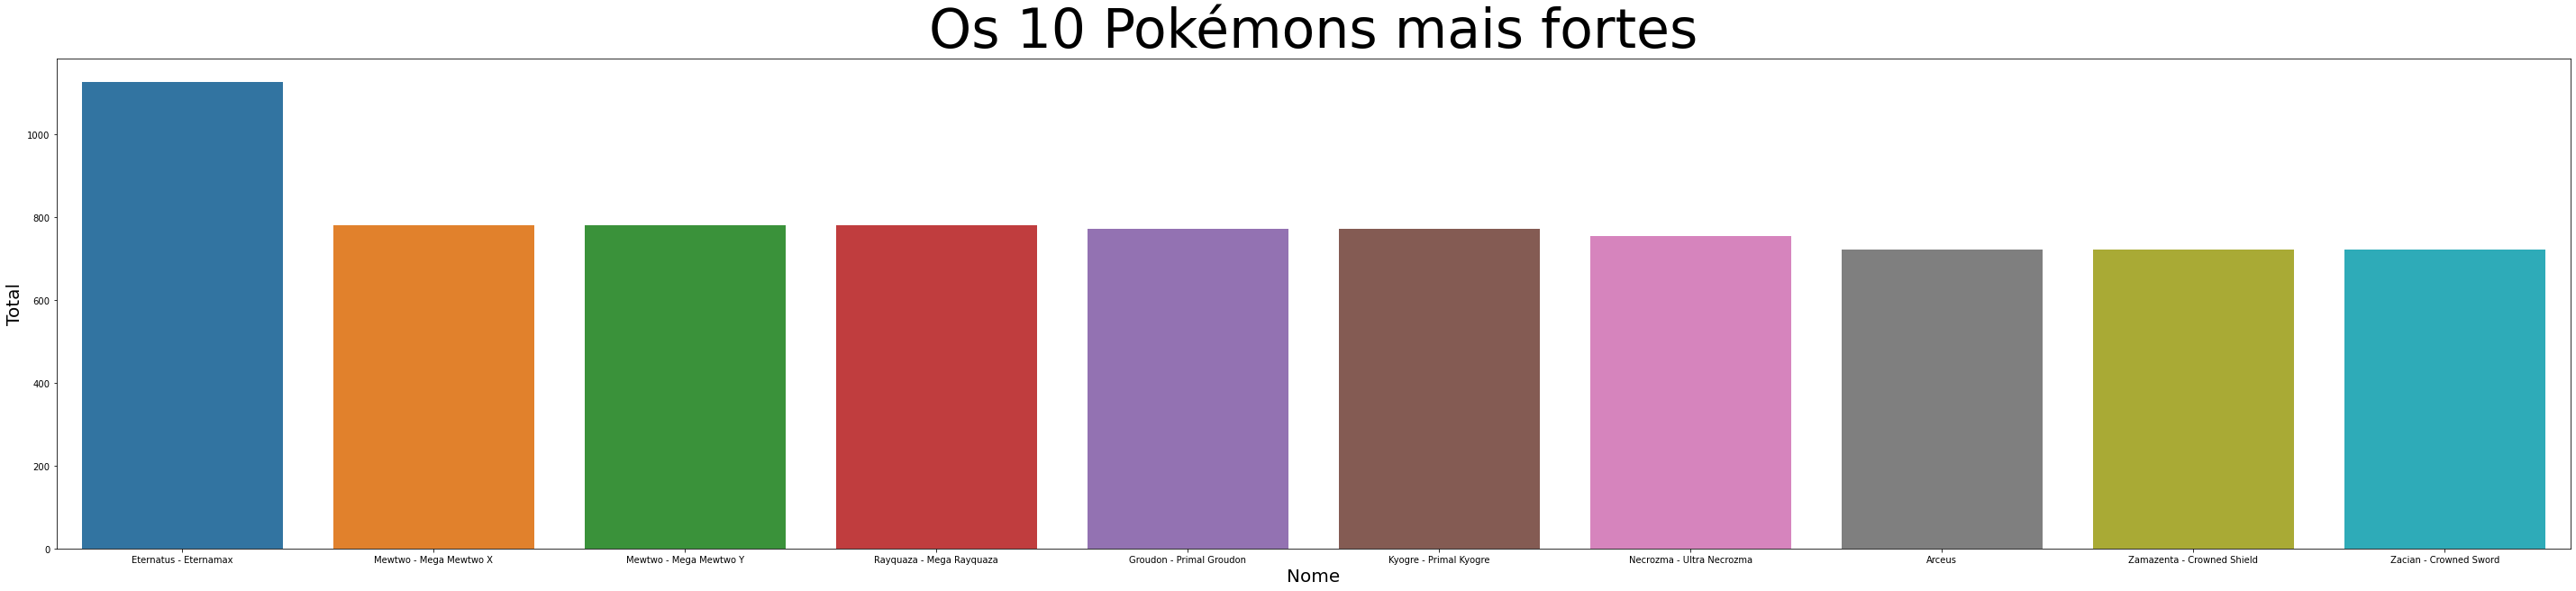

In [34]:
# Define o tamanho do gráfico
plt.figure(figsize = (50, 10))

# Define o eixo x e y
bar_plot = sns.barplot(x=top10['Name'], y=top10['Total'])

# Define o título do gráfico e tamanho da fonte
bar_plot.set_title('Os 10 Pokémons mais fortes', fontsize=60)

# Define o título do eixo x e tamanho da fonte
bar_plot.set_xlabel('Nome', fontsize=20)

# Define o título do eixo y e tamanho da fonte
bar_plot.set_ylabel('Total', fontsize=20)

# Exibe o gráfico
# O uso do ; é proposital, ele remove uns textos que deixam feio o notebook
plt.show();

Como podemos verificar, os valores são bem próximos.

## Histograma

## Distribuição de Pokémons de acordo com o poder

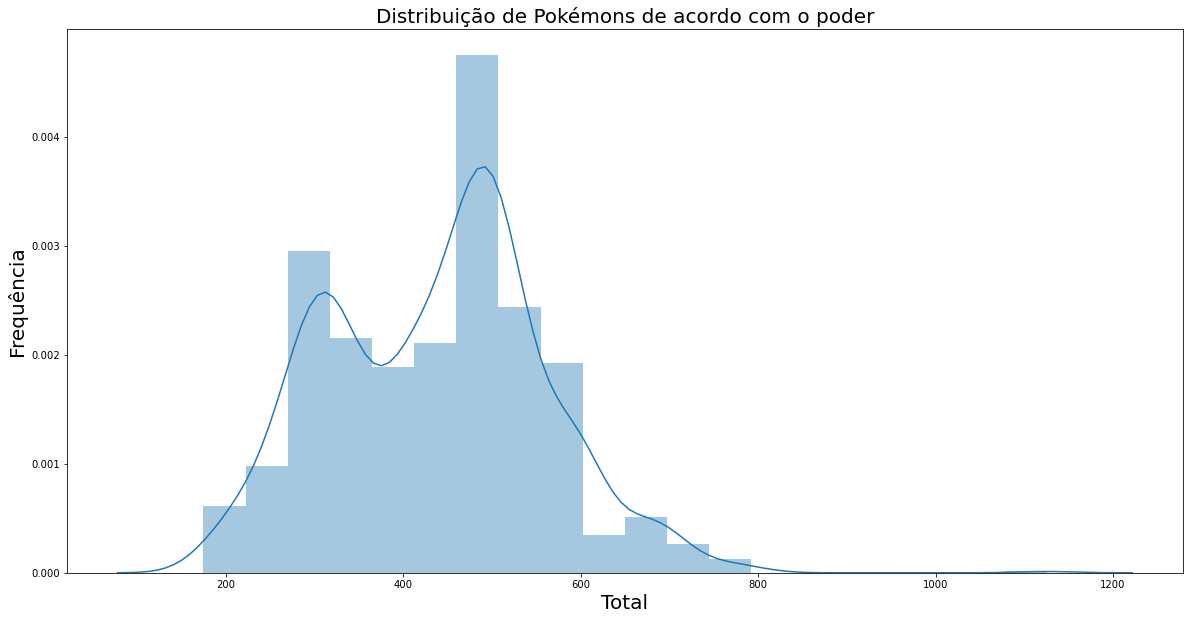

In [35]:
# Define o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Define de qual item será avaliado a distribuição e gera as barras (bins) de acordo com o valor informado
# Atenção, divisões podem gerar resto e o parâmetro bin recebe um inteiro, então deve-se converter (cast) para int
dist_plot = sns.distplot(df['Total'], bins=int(df.shape[0]/50))

# Define o título do gráfico e tamanho da fonte
dist_plot.set_title('Distribuição de Pokémons de acordo com o poder', fontsize=20)

# Define o título do eixo x e tamanho da fonte
dist_plot.set_xlabel('Total', fontsize=20)

# Define o título do eixo y e tamanho da fonte
dist_plot.set_ylabel('Frequência', fontsize=20)

# Exibe o gráfico
# O uso do ; é proposital, ele remove uns textos que deixam feio o notebook
plt.show();

Como podemos verificar, grande parte dos Pokémons estão concentrados em 450.

## Diagrama de Caixa

### Variação: Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed por meio de quartis.

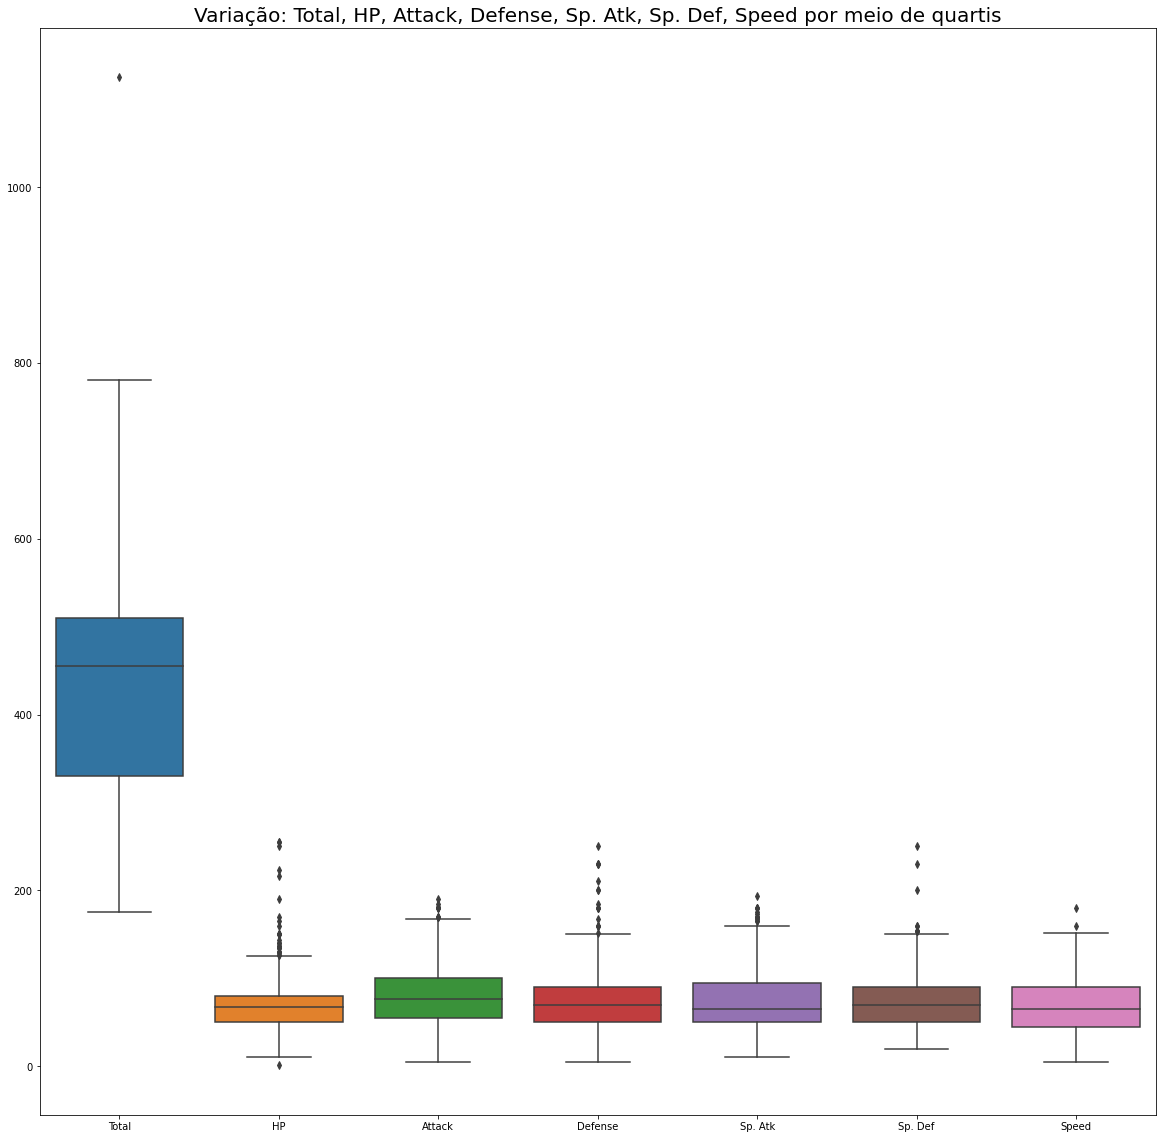

In [36]:
# Define o tamanho do gráfico
plt.figure(figsize=(20, 20))

# Define os dados para gerar o gráfico, sendo que ele aceita como parâmetro um DataFrame inteiro no data, e depois é
# possível informar as colunas que deseja utilizar desse DataFrame no parâmetro order, para usar mais de uma coluna, deve-se
# utilizar uma lista
boxplot = sns.boxplot(data=df, order=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

# Define o título do gráfico e tamanho da fonte
boxplot.set_title('Variação: Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed por meio de quartis', fontsize=20)

# Exibe o gráfico
# O uso do ; é proposital, ele remove uns textos que deixam feio o notebook
plt.show();

## Gráfico de linha

### Avanço do poder do Bulbasaur a cada evolução

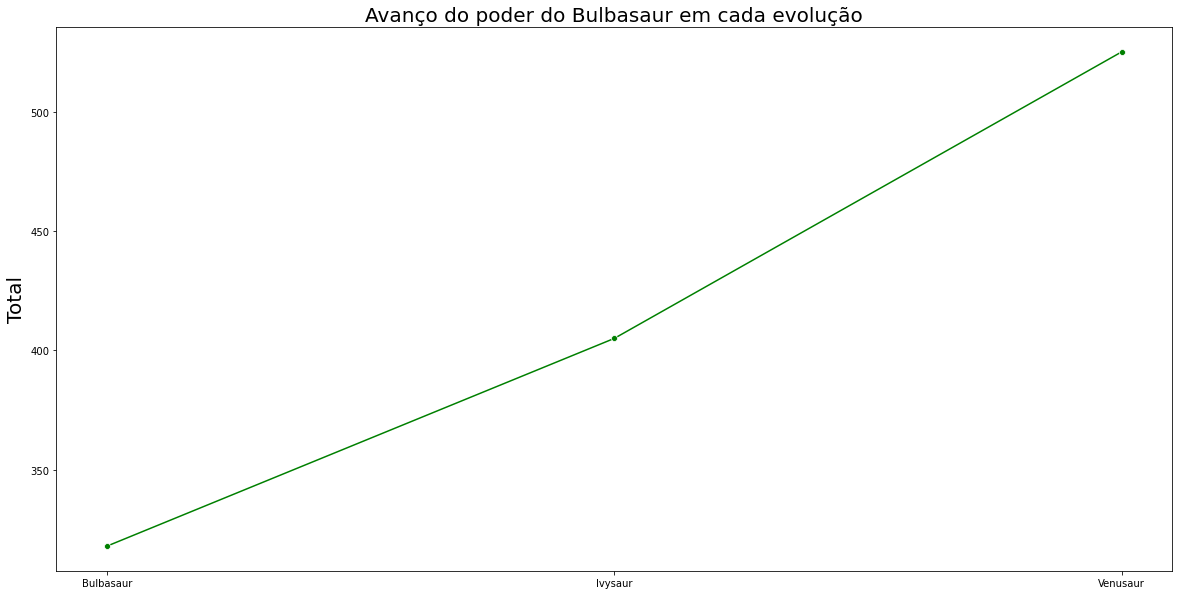

In [37]:
# Define o tamanho do gráfico
plt.figure(figsize = (20, 10))

# Define o eixo x e y
# No caso foi utilizado o DataFrame original, da linha 1 a 3
lineplot = sns.lineplot(x=df.iloc[0:3]['Name'],
                        y=df.iloc[0:3]['Total'],
                        color='green',
                        marker='o')                        

# Define o título do gráfico e tamanho da fonte
lineplot.set_title('Avanço do poder do Bulbasaur em cada evolução', fontsize=20)

# Define o título do eixo x, aqui utilizamos um truque para sumir com o título (experimente executar sem e veja o resultado)
lineplot.set_xlabel('')

# Define o título do eixo y e tamanho da fonte
lineplot.set_ylabel('Total', fontsize=20)

# Exibe o gráfico
# O uso do ; é proposital, ele remove uns textos que deixam feio o notebook
plt.show();

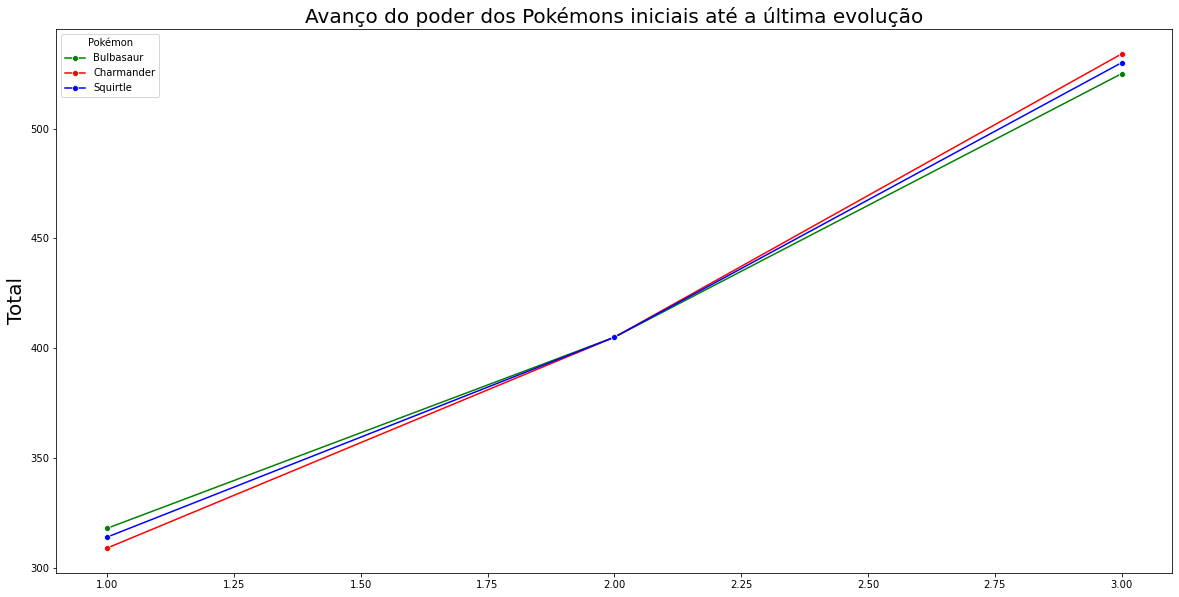

In [38]:
# Define o tamanho do gráfico
plt.figure(figsize = (20, 10))

# Define o eixo x e y, cor da linha, título na legenda e marcador de início e fim de uma linha
# No caso foi utilizado o DataFrame dos Pokémons iniciais
lineplot = sns.lineplot(x=df_bulbasaur['Evolution Order'],
                        y=df_bulbasaur['Total'],
                        color='green',
                        label='Bulbasaur',
                        marker='o')

lineplot = sns.lineplot(x=df_charmander['Evolution Order'],
                        y=df_charmander['Total'],
                        color='red',
                        label='Charmander',
                        marker='o')

lineplot = sns.lineplot(x=df_squirtle['Evolution Order'],
                        y=df_squirtle['Total'],
                        color='blue',
                        label='Squirtle',
                        marker='o')

# Define o título do gráfico e tamanho da fonte
lineplot.set_title('Avanço do poder dos Pokémons iniciais até a última evolução', fontsize=20)

# Define o título do eixo x, aqui utilizamos um truque para sumir com o título (experimente executar sem e veja o resultado)
lineplot.set_xlabel('')

# Define o título do eixo y e tamanho da fonte
lineplot.set_ylabel('Total', fontsize=20)

# Gera a legenda com título e título dos elementos
plt.legend(title='Pokémon')

# Exibe o gráfico
# O uso do ; é proposital, ele remove uns textos que deixam feio o notebook
plt.show();